<div style="color: navy; text-align: center; font-family: 'Georgia', serif; font-size: 32px; font-weight: bold;">
    Description
</div>


<div style="color: green; text-align: left; font-family: 'Arial', sans-serif; font-size: 24px;">
    Hello, dear colleagues!
</div>

<div style="color: dark-blue; text-align: left; font-family: 'Arial', sans-serif; font-size: 20px;">
    This notebook was made in educational purposes, every model was created by myself using official documentation.
    I hope it will be useful for other beginners in ML.
    If you have check it, please, upvote!
    If you have any questions or suggestions about improvements, leave it in comment section.
</div>


# Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import plotly
import plotly.express as px
from sklearn.model_selection import train_test_split

# Data Import

In [2]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train_data.drop('Id', axis=1,inplace=True)

In [4]:
submission_sample = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

# About dataset

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## House Price (target variable) Distribution

In [6]:
fig = px.histogram(train_data['SalePrice'], nbins=100, title='Пример гистограммы')
fig.show()
print(train_data['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [7]:
df_train_num = train_data.select_dtypes(include = ['float64', 'int64'])
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

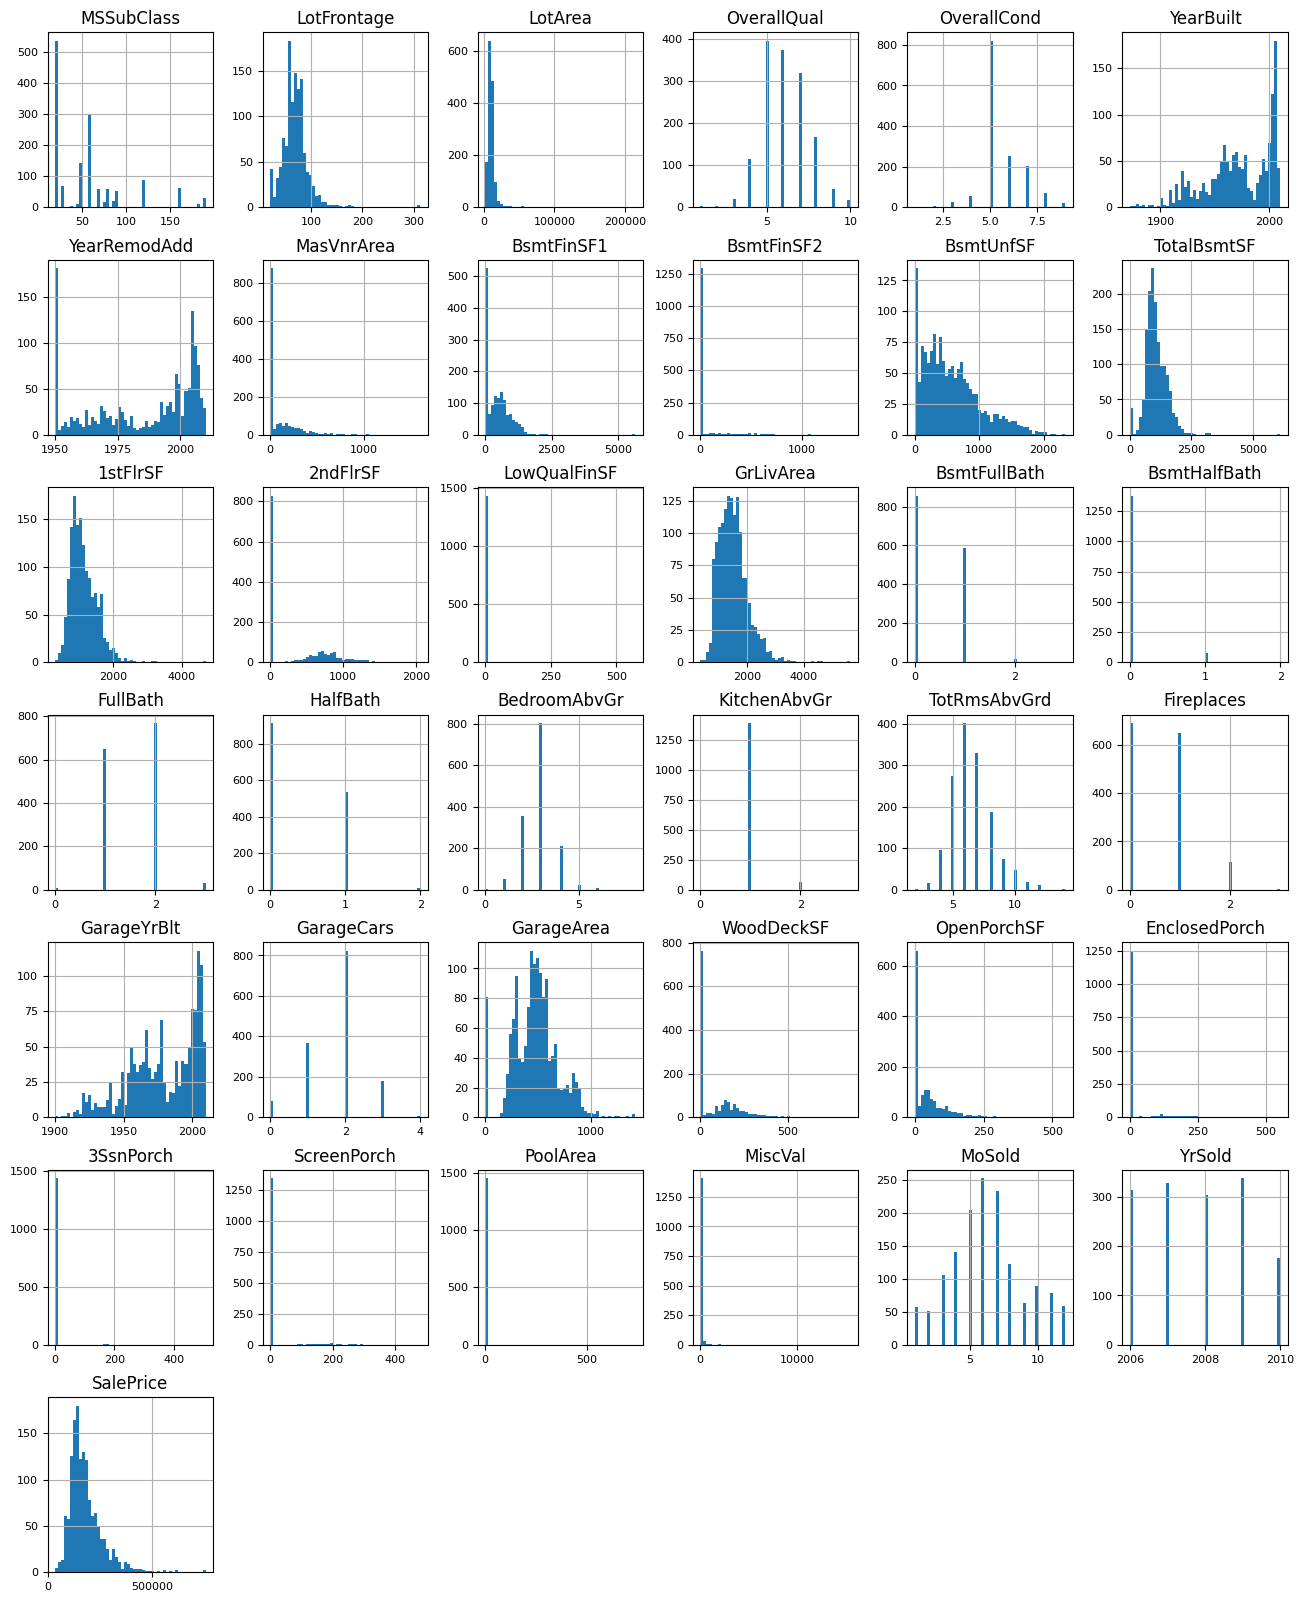

In [8]:
df_train_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

1. XGBOOST

In [9]:
X, y = train_data.drop('SalePrice', axis=1), train_data['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

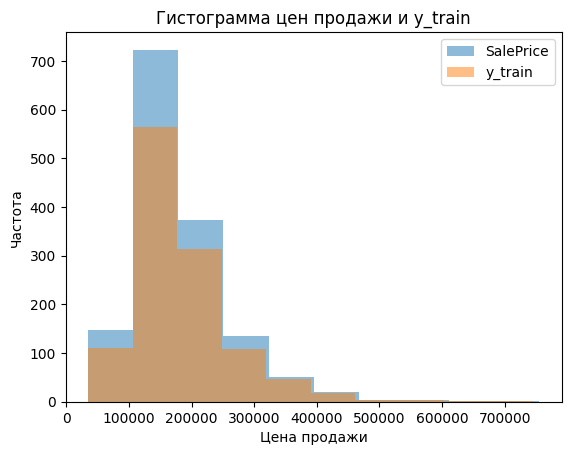

In [10]:
plt.hist(train_data['SalePrice'], label='SalePrice', alpha=0.5)  # alpha устанавливает прозрачность
plt.hist(y_train, label='y_train', alpha=0.5)  # alpha устанавливает прозрачность
plt.legend()  # Добавляем легенду для обозначения данных
plt.xlabel('Цена продажи')  # Устанавливаем подпись для оси X
plt.ylabel('Частота')  # Устанавливаем подпись для оси Y
plt.title('Гистограмма цен продажи и y_train')  # Устанавливаем заголовок графика
plt.show()  # Отображаем график


In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Задаем параметры для автоподбора
# param_grid = {
#     'n_estimators': [1000, 2000, 3000],  # Можно изменить диапазон
#     'max_depth': [3, 4, 5],           # Можно изменить диапазон
#     'learning_rate': [0.01, 0.05, 0.0005], # Можно изменить диапазон
#     'subsample': [0.3, 0.5, 0.7],     # Можно изменить диапазон
# }

param_grid = {
    'n_estimators': [3000],  # Можно изменить диапазон
    'max_depth': [3],           # Можно изменить диапазон
    'learning_rate': [0.01], # Можно изменить диапазон
    'subsample': [0.7],     # Можно изменить диапазон
}

# Создаем модель XGBoost
model = xgb.XGBRegressor(eval_metric='logloss', tree_method="hist", objective='reg:squarederror', enable_categorical=True)

# Создаем объект GridSearchCV для поиска по сетке
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Разделяем данные на обучающий и тестовый наборы
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
    "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
    "Condition2", "HouseStyle", "OverallQual", "OverallCond", "RoofStyle",
    "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual",
    "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure",
    "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "Electrical",
    "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
    "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
    "SaleType", "SaleCondition", "BldgType", "CentralAir"
]

for feature in categorical_features:  
    X_train[feature] = X_train[feature].astype("category")
    X_valid[feature] = X_valid[feature].astype("category")
    

# Запускаем поиск по сетке
grid_search.fit(X_train, y_train)

# Получаем лучшие параметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Создаем модель с лучшими параметрами
best_model = xgb.XGBRegressor(**best_params, eval_metric='logloss', tree_method="hist", objective='reg:squarederror', enable_categorical=True)

# Обучаем модель с лучшими параметрами
best_model.fit(X_train, y_train)

# Делаем предсказания
y_pred = best_model.predict(X_valid)
y_train_pred = best_model.predict(X_train)

# Выводим результаты
print(f"Среднеквадратичная ошибка (MSE) на обучающем наборе: {mean_squared_error(y_train, y_train_pred)}")
print(f"Среднеквадратичная ошибка (MSE) на тестовом наборе: {mean_squared_error(y_valid, y_pred)}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 3000, 'subsample': 0.7}
Среднеквадратичная ошибка (MSE) на обучающем наборе: 48174791.80032593
Среднеквадратичная ошибка (MSE) на тестовом наборе: 1455114297.8167462


In [12]:
feature_importance = best_model.get_booster().get_score(importance_type='weight')

sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

top_n_features = [feature[0] for feature in sorted_feature_importance[:37]]

print(f"Топ {len(top_n_features)} признаков:")
for feature in top_n_features:
    print(feature)

# xgb.plot_importance(model, importance_type='weight')  # 'weight', 'gain', или 'cover'
# plt.show()

Топ 37 признаков:
Neighborhood
GrLivArea
MSSubClass
LotFrontage
OverallQual
LotArea
TotalBsmtSF
Exterior1st
BsmtUnfSF
BsmtFinSF1
OverallCond
GarageArea
Exterior2nd
MasVnrArea
SaleCondition
YearBuilt
OpenPorchSF
1stFlrSF
MoSold
BsmtFinType1
GarageYrBlt
2ndFlrSF
WoodDeckSF
Condition1
BsmtExposure
LandContour
LotConfig
YearRemodAdd
Functional
SaleType
FireplaceQu
BsmtQual
KitchenQual
ScreenPorch
YrSold
GarageType
Fence


In [13]:
# X, y = train_data.drop('SalePrice', axis=1), train_data['SalePrice']
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train = X_train[top_n_features]
X_valid = X_valid[top_n_features]

In [15]:
# categorical_features = [
#     "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
#     "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
#     "Condition2", "HouseStyle", "OverallQual", "OverallCond", "RoofStyle",
#     "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual",
#     "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure",
#     "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "Electrical",
#     "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish",
#     "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature",
#     "SaleType", "SaleCondition", "BldgType", "CentralAir"
# ]

# for feature in categorical_features:
#     try:
#         X_train[feature] = X_train[feature].astype("category")
#         X_valid[feature] = X_valid[feature].astype("category")
#     except:
#         pass

In [16]:
model = xgb.XGBRegressor(n_estimators=2560, max_depth=3, learning_rate=0.01, subsample=0.85, eval_metric='logloss', tree_method="hist", objective='reg:squarederror', enable_categorical=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_train_pred = model.predict(X_train)


print(f"Среднеквадратичная ошибка (MSE): {mean_squared_error(y_train, y_train_pred)}")
print(f"Среднеквадратичная ошибка (MSE): {mean_squared_error(y_valid, y_pred)}")

Среднеквадратичная ошибка (MSE): 60394837.70693382
Среднеквадратичная ошибка (MSE): 1470198616.8381653


In [17]:
for feature in categorical_features:  
    test_data[feature] = test_data[feature].astype("category")
    
test_predict = model.predict(test_data[top_n_features])

In [18]:
output = pd.DataFrame({'Id':test_data.Id,
                       'SalePrice':test_predict})

output.to_csv('submission.csv',index=False)